# **La Stéganographie**
---








La stéganographie consiste à dissimuler un message dans une image en niveaux de gris en modifiant les valeurs des pixels de manière imperceptible. L'objectif est de rendre la détection du message difficile lors de la stéganalyse. Les modifications peuvent être binaires, ternaires ou de nature M-aires. Chaque pixel a un poids associé en fonction de la valeur de la modification, mesurant le coût d'une telle modification. La distorsion totale est calculée sur l'ensemble de l'image, en tenant compte de la sensibilité des pixels aux modifications.

Objectif ✅
---


L'objectif de ce travail est de maximiser le taux d'insertion d'un message dans une image en niveaux de gris tout en maintenant une distorsion prédéterminée, en utilisant différents programmes d'optimisation avec contraintes et en explorant différentes configurations de poids et de tailles de blocs.


# **Installation des modules nécessaires** ✔


---


In [11]:
!pip install sympy
!pip install numpy
!pip install scipy
!pip install cvxpy
!pip install matplotlib
!pip install Pillow


DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


# **Importation des bibliothèques nécessaires** ✔


---



In [4]:
from sympy import symbols                     # Créer des symboles symboliques

from sympy import log                         # Fonction logarithme

from sympy import Sum                         # Représentation d'une somme symbolique

from sympy import IndexedBase                 # Base pour la création d'indices symboliques

from sympy import Matrix                      # Classe pour la manipulation de matrices symboliques

from sympy import latex                       # Fonction pour convertir des objets SymPy en code LaTeX

from sympy import init_printing               # Initialiser la sortie d'impression pour des expressions mathématiques

from IPython.display import display           # Afficher les objets SymPy dans le notebook

from IPython.display import Latex             # Afficher du code LaTeX dans le notebook

import numpy as np                            # utilisée pour des opérations numériques et des manipulations de tableaux

from scipy.linalg import solve                # Résoudre un système d'équations linéaires

import cvxpy as cp                            # Optimisation convexe

import matplotlib.pyplot as plt               # Utilisée pour la visualisation de données

from mpl_toolkits.mplot3d import Axes3D       # Créer des graphiques 3D dans Matplotlib

from PIL import Image                         # Représenter et manipuler des images

# **Formulation du programme** ✔

---





$$\text{Minimiser } f_0: -\sum_{i=0}^{n-1} \log_2 \left(\frac{1}{\pi_i}\right) \pi_i$$
$$\text{Condition } f_1 < 0: -d_0 + \sum_{i=0}^{n-1} \rho \pi_i < 0$$
$$\text{Condition } h_0 = 0: \sum_{i=0}^{n-1} \pi_i - 1 = 0$$


In [28]:
init_printing(use_latex='mathjax')                                     # Activation de l'impression jolie pour les expressions mathématiques dans le notebook


# Définition de symboles symboliques

n, rho, d0 = symbols('n rho d0', real=True)

i = symbols('i', integer=True)

pi = IndexedBase('pi')


# Définition de fonctions mathématiques

def f0(pi_i):

    return pi_i * log(1 / pi_i, 2)


def f1(pi_i, rho):

    return rho * pi_i


def h0(pi_i):

    return pi_i


def gradient(pi_i):

    return -log(pi_i, 2) - 1


def calculate_gradient_expr(n_val):

    return [gradient(pi[i]) for i in range(n_val)]


# Calcul du gradient pour une valeur spécifique de n

n_val = 5

gradient_expr = calculate_gradient_expr(n_val)


gradient_matrix = Matrix(gradient_expr)                              # Création d'une matrice à partir des expressions du gradient


# Définition des sommes symboliques


sum_f0 = Sum(f0(pi[i]), (i, 0, n - 1))

sum_f1 = Sum(f1(pi[i], rho), (i, 0, n - 1)) - d0

sum_h0 = Sum(h0(pi[i]), (i, 0, n - 1)) - 1


# Conversion des expressions en code LaTeX

latex_f0 = latex(sum_f0)

latex_f1 = latex(sum_f1)

latex_h0 = latex(sum_h0)


# Affichage des expressions dans le notebook

display(Latex(f'$$\\text{{minimiser f0 : }} -{latex_f0}$$'))

display(Latex(f'$$\\text{{Condition f1 < 0: }} {latex_f1} < 0$$'))

display(Latex(f'$$\\text{{Condition h0 = 0: }} {latex_h0} = 0$$'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

# **Evolution du taux d'insertion suivant M pour différents algorithmes**


---



# ***Algorithme de Newton*** ✔


>>>>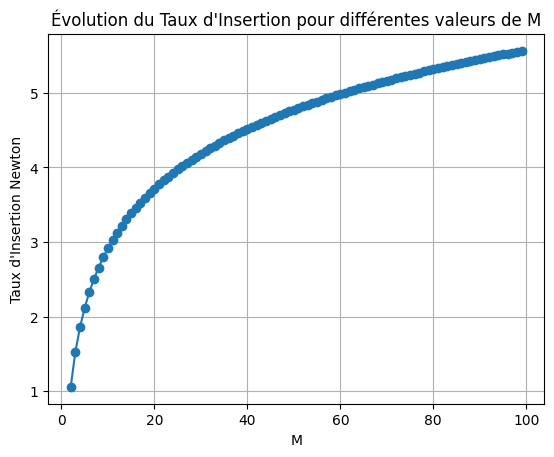



In [ ]:
# Définition de la fonction objectif

def f0(pi):

    return np.sum(pi * np.log2(1/pi))


# Calcul du gradient de la fonction objectif

def gradient(pi):
    return -np.log2(pi) - 1


# Calcul de la matrice hessienne

def hessian(pi):

    n = len(pi)

    return np.diag(1 / (pi * np.log(2)))


# Calcul de la matrice des contraintes linéaires

def linear_constraint_matrix(pi):

    n = len(pi)

    A = np.ones((2, n))

    A[1] = rho_values

    return A


# Calcul du vecteur des contraintes linéaires

def linear_constraint_vector():

    return np.array([1.0, d0])


# Implémentation de la méthode de Newton avec contraintes d'égalité

def newton_method_with_equality_constraints(pi0, epsilon=1e-6, max_iterations=100):

    pi = pi0.copy()

    for _ in range(max_iterations):

        grad_f = gradient(pi)

        hess_f = hessian(pi)

        # Vérifier si la matrice hessienne et définie positive

        if np.any(np.linalg.eigvals(hess_f) <= 0):

            print("La matrice Hessienne n'est pas définie positive.")

            break

        A = linear_constraint_matrix(pi)

        b = linear_constraint_vector()

        AT = A.T

        # Construction du système d'équations linéaires

        system_matrix = np.block([[hess_f, AT], [A, np.zeros((2, 2))]])

        rhs = np.concatenate([-grad_f, -np.dot(A, pi) + b])

        # Résolution du système linéaire

        solution, residuals, rank, s = np.linalg.lstsq(system_matrix, rhs, rcond=None)

        delta_pi = solution[:len(pi)]

        # Mise à jour de la solution

        pi += delta_pi

        # Condition de convergence

        if np.linalg.norm(delta_pi) < epsilon:

            break

    return pi


# Paramètres

M_values = range(2, 100)

d0 = 1.5

rho_value = 2



insertion_rates = []       # Liste pour stocker les taux d'insertion calculés


# Boucle sur différentes valeurs de M

for M in M_values:

    pi0 = np.ones(M) / M

    rho_values = np.full(M, rho_value)

    pi = newton_method_with_equality_constraints(pi0)

    insertion_rate = f0(pi)

    insertion_rates.append(insertion_rate)

# Tracer le taux d'insertion en fonction de M

plt.plot(M_values, insertion_rates, marker='o')

plt.xlabel('M')

plt.ylabel('Taux d\'Insertion Newton')

plt.title('Évolution du Taux d\'Insertion pour différentes valeurs de M')

plt.grid(True)

plt.show()

# ***Exponential cone solver*** ✔
>>>>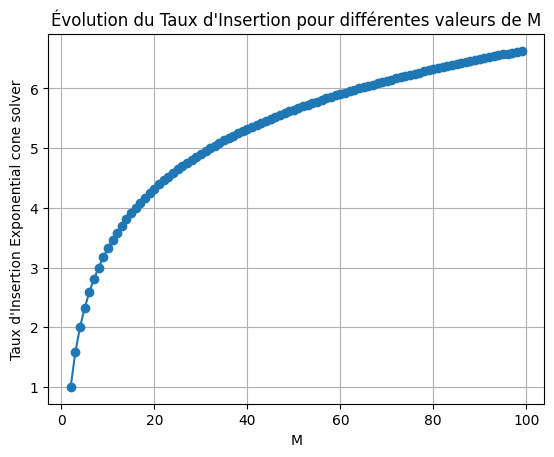

In [ ]:
# Fonction pour résoudre le problème

def solve_optimization_problem(M, rho, d0):

    pi = cp.Variable(M)                                                       # Définition de la variable de décision

    objective = cp.Maximize(cp.sum(cp.entr(pi)))                              # Définition de la fonction objectif à maximiser

    constraints = [cp.sum(pi) == 1, cp.matmul(rho, pi) <= d0]                 # Définition des contraintes linéaires

    problem = cp.Problem(objective, constraints)                              # Définition du problème d'optimisation

    result = problem.solve(solver=cp.ECOS)                                                  # Résolution du problème


    # Vérification du statut de la résolution

    if problem.status in ["infeasible", "unbounded"]:

        return None

    else:

        return pi.value


# Paramètres initiaux

d0 = 1.5

rho_value = 2

M_values = range(2, 100)

insertion_rates = []                                                           # Liste pour stocker les taux d'insertion calculés


# Boucle sur différentes valeurs de M

for M in M_values:

    rho_values = np.linspace(1, rho_value, M)

    optimal_pi = solve_optimization_problem(M, rho_values, d0)                 # Résolution du problème d'optimisation

    if optimal_pi is not None:

        insertion_rate = -np.sum(optimal_pi * np.log(optimal_pi)) / np.log(2)  # Calcul du taux d'insertion

        insertion_rates.append(insertion_rate)

    else:

        print(f"Le problème pour M={M} n'a pas pu être résolu.")


# Tracer le taux d'insertion en fonction de M

if insertion_rates:

    plt.plot(M_values[:len(insertion_rates)], insertion_rates, marker='o')

    plt.xlabel('M')

    plt.ylabel('Taux d\'Insertion Exponential cone solver')

    plt.title('Évolution du Taux d\'Insertion pour différentes valeurs de M')

    plt.grid(True)

    plt.show()

else:

    print("Aucune solution valide trouvée pour les valeurs de M testées.")

# ***Gradient projeté*** ✔
>>>>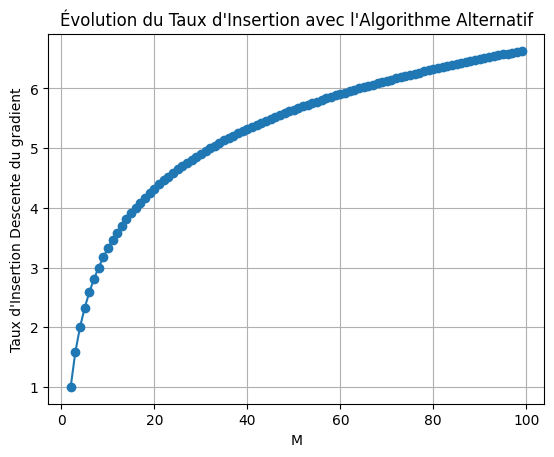

In [ ]:
# Fonction pour la définition de l'algorithme du gradient projeté

def projection_simplex(v, z=1):

    # Projection sur le simplexe pour la contrainte de somme égale à 1

    n = len(v)

    u = np.sort(v)[::-1]

    cssv = np.cumsum(u) - z

    ind = np.arange(n) + 1

    rho = ind[u - cssv / ind > 0][-1]

    theta = cssv[u - cssv / ind > 0][-1] / rho

    return np.maximum(v - theta, 0)


# Fonction pour résoudre le problème avec l'algorithme alternatif

def solve_optimization_alternative(M, rho, d0, alpha=0.01, max_iter=1000):

    pi = np.ones(M) / M                                                         # Initialisation de pi

    for _ in range(max_iter):

        grad = -np.log2(pi) - 1                                                 # Gradient de la fonction objectif

        pi -= alpha * grad                                                      # Mise à jour de pi

        pi = projection_simplex(pi)                                             # Projection sur le simplexe

        if np.dot(rho, pi) <= d0:                                               # Vérification de la contrainte d'inégalité

            break

    return pi


# Générer des valeurs pour M

M_values = range(2, 100)

insertion_rates_alternative = []                                                # Liste pour stocker les taux d'insertion


# Boucle sur différentes valeurs de M

for M in M_values:

    rho_values = np.linspace(1, 2, M)

    optimal_pi_alternative = solve_optimization_alternative(M, rho_values, d0)  # Résolution du problème avec l'algorithme alternatif

    insertion_rate_alternative = -np.sum(optimal_pi_alternative * np.log(optimal_pi_alternative)) / np.log(2)

    insertion_rates_alternative.append(insertion_rate_alternative)


# Tracer le taux d'insertion en fonction de M

plt.plot(M_values, insertion_rates_alternative, marker='o')

plt.xlabel('M')

plt.ylabel('Taux d\'Insertion Gradient projeté')

plt.title('Évolution du Taux d\'Insertion avec l\'Algorithme Alternatif')

plt.grid(True)

plt.show()


# ⚫  **On remarque que les 2 méthodes, la descente du gradient ainsi que la résolution par le cone exponentiel sont celles qui donnent un taux d'insertion plus élevé pour M=100, on compare ensuite la distorsion obtenue avec chacune des deux méthodes pour déduire celle qui donne la solution pi optimale.**


---



# ***Gradient projeté*** ✔
d= 1.4999999999999951

In [ ]:
# Définition de la fonction objective f0

def objective_function(pi):

    # Éviter les valeurs de pi égales à 0 pour le calcul du log

    pi = np.maximum(pi, 1e-8)

    return np.sum(pi * np.log2(1 / pi))


# Paramètres du problème

M = 100

rho = np.linspace(1, 2, M)

d0 = 1.5


# Initialisation de pi

pi = np.ones(M) / M


# Paramètres de l'algorithme

alpha = 0.01                                  # Taux d'apprentissage

max_iter = 1000                               # Nombre maximal d'itérations



# Boucle d'optimisation

for _ in range(max_iter):

    grad = -np.log2(pi) - 1                   # Gradient de la fonction objectif

    pi -= alpha * grad                        # Mise à jour de pi

    pi = projection_simplex(pi)               # Projection sur le simplexe

    if np.dot(rho, pi) <= d0:                 # Vérification de la contrainte d'inégalité

        break

distorsion_projectionsimplexe = np.dot(rho, pi)

# Affichage des résultats

print("Distribution optimale de pi:", pi)

print("Valeur optimale de la fonction objectif:", objective_function(pi))

print("Vérification de la contrainte d'égalité (Somme des pi):", np.sum(pi))

print("Vérification de la contrainte d'inégalité (Somme pondérée des pi/ Distorsion):", distorsion_projectionsimplexe)

# ***Exponential cone solver*** ✔
1.4999697237882246

In [ ]:
# Paramètres du problème

M = 100                                                    # Commencer avec M = 100

rho = np.linspace(1, 2, M)                                 # Créer un vecteur de poids de taille M

d0 = 1.5                                                   # Valeur maximale de distorsion

pi = cp.Variable(M)                                        # Variables d'optimisation

objective = cp.Maximize(cp.sum(cp.entr(pi) / np.log(2)))   # Fonction objectif

constraints = [cp.sum(pi) == 1, cp.matmul(rho, pi) <= d0]  # Contraintes


# Résoudre le problème

prob = cp.Problem(objective, constraints)

prob.solve(solver=cp.ECOS)                                #Utilisation du exponential cone solver


distorsion_cvxpy = np.dot(rho, pi.value)

# Afficher les résultats

print("Distribution optimale de pi:", pi.value)

print("Valeur optimale de la fonction objectif:", prob.value)

print("Vérification de la contrainte d'égalité (Somme des pi):", np.sum(pi.value))

print("Vérification de la contrainte d'inégalité (Somme pondérée des pi / Distorsion):", distorsion_cvxpy)

# ⚫  **On remarque que la distorsion est plus élevée pour le cas de l'utilisation de la méthode du gradient projeté**

In [20]:
if distorsion_cvxpy<distorsion_projectionsimplexe:

  print("On va utiliser la méthode de exponential cone solver pour trouver la valeur optimale de pi")

else: print("On va utiliser la méthode de prjection sur le simplexe pour trouver la valeur optimale de pi")

On va utiliser la méthode de exponential cone solver pour trouver la valeur optimale de pi


# ⚫  **On utilise la méthode de exponential cone solver pour trouver la valeur optimale de pi à représenter dans cette section**


---



# ***Représentation des courbe de niveaux de la fonction f0 en 2 Dimensions*** ✔
>>>>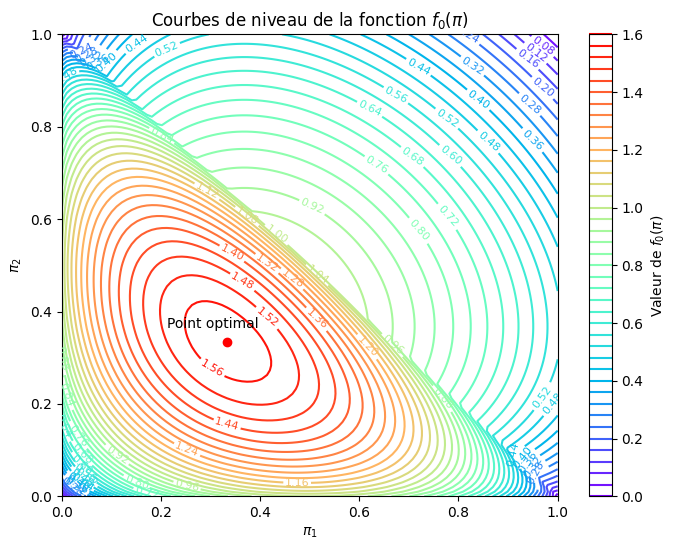

In [ ]:
# Définition de la fonction objectif f0

def f0(pi1, pi2):

    pi3 = 1 - pi1 - pi2

    # Éviter les valeurs négatives ou nulles dans le logarithme

    pi1 = np.maximum(pi1, 1e-9)

    pi2 = np.maximum(pi2, 1e-9)

    pi3 = np.maximum(pi3, 1e-9)

    return pi1 * np.log2(1 / pi1) + pi2 * np.log2(1 / pi2) + pi3 * np.log2(1 / pi3)


# Générer des valeurs pour pi1 et pi2

pi1, pi2 = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))


# Calculer les valeurs de f0 pour chaque combinaison de pi1 et pi2

f0_values = f0(pi1, pi2)


# Tracer la courbe de niveau

plt.figure(figsize=(8, 6))

contours = plt.contour(pi1, pi2, f0_values, 50, cmap='rainbow')

plt.clabel(contours, inline=True, fontsize=8)

plt.xlabel('$\pi_1$')

plt.ylabel('$\pi_2$')

plt.title('Courbes de niveau de la fonction $f_0(\pi)$')

plt.colorbar(contours, label='Valeur de $f_0(\pi)$')


# Marquer le point optimal

optimal_pi = [0.33335127, 0.33334246, 0.33330626]

# Point rouge pour la solution optimale

plt.plot(optimal_pi[0], optimal_pi[1], 'ro')

plt.annotate('Point optimal', (optimal_pi[0], optimal_pi[1]), textcoords="offset points", xytext=(-10,10), ha='center')

plt.show()

# ***Représentation des courbe de niveaux de la fonction f0 en 3 Dimensions*** ✔
>>>>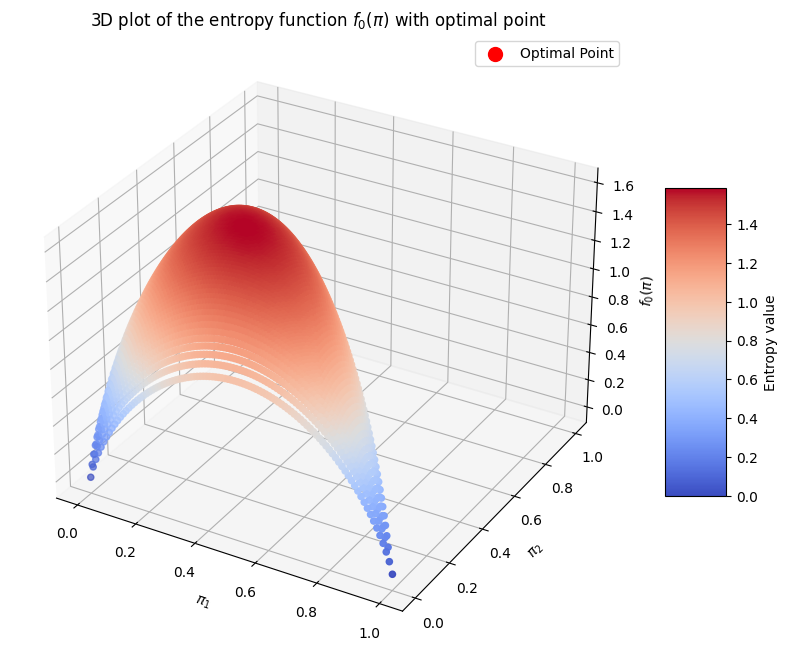

In [ ]:
# Définir la fonction d'entropie pour 3 variables

def f0(pi1, pi2, pi3):

    # Éviter les problèmes de logarithme de zéro en ajustant les valeurs

    pi1 = np.clip(pi1, 1e-12, None)

    pi2 = np.clip(pi2, 1e-12, None)

    pi3 = np.clip(pi3, 1e-12, None)

    return pi1 * np.log2(1/pi1) + pi2 * np.log2(1/pi2) + pi3 * np.log2(1/pi3)


# Générer une grille de points dans le simplex (pi1 + pi2 + pi3 = 1)

pi1_range = np.linspace(0, 1, 100)

pi2_range = np.linspace(0, 1, 100)

pi1, pi2 = np.meshgrid(pi1_range, pi2_range)

pi3 = 1 - pi1 - pi2


# Filtrer les combinaisons invalides (pi < 0)

valid = pi3 >= 0

pi1, pi2, pi3 = pi1[valid], pi2[valid], pi3[valid]


# Calculer l'entropie pour chaque combinaison valide

f0_values = f0(pi1, pi2, pi3)


# Tracé

fig = plt.figure(figsize=(10, 8))

ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(pi1, pi2, f0_values, c=f0_values, cmap='coolwarm')


# Point optimal fourni

optimal_pi = [0.33335127, 0.33334246, 0.33330626]

optimal_value = f0(optimal_pi[0], optimal_pi[1], optimal_pi[2])


# Tracer le point optimal

ax.scatter([optimal_pi[0]], [optimal_pi[1]], [optimal_value], color='r', s=100, label='Optimal Point')


# Étiquettes et titre

ax.set_xlabel('$\pi_1$')

ax.set_ylabel('$\pi_2$')

ax.set_zlabel('$f_0(\pi)$')

ax.set_title('3D plot of the entropy function $f_0(\pi)$ with optimal point')


ax.legend()     # Légende


# Barre de couleur pour montrer les valeurs d'entropie

cbar = fig.colorbar(scatter, shrink=0.5, aspect=5)

cbar.set_label('Entropy value')

plt.show()

# **On utilise par la suite la méthode de Newton et l'exponential cone solver pour analyser leur application sur une image :**


*   Pour une carte de poids équivalente pour tous les pixels
*   Pour différentes ccartes de poids

# **On prendra comme taille de blocks 3 c'est-à-dire 9 pixels**


---





# ▶▶ **Pour une carte de poids équivalente pour tous les pixels** ◀◀

# ***Exponential cone solver*** ✔
>>>>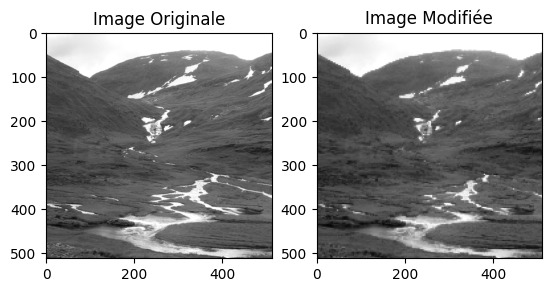

In [7]:
# Fonction pour maximiser la fonction d'entropie

def apply_maxent_to_block_cvxpy(block, rho, d0):

    M = block.size

    pi = cp.Variable(M)

    block_min = block.min()

    block_max = block.max()

    block_normalized = (block - block_min) / (block_max - block_min + 1e-6)


    # Fonction objectif : Maximiser l'entropie

    objective = cp.Maximize(cp.sum(cp.entr(pi)))


    # Contraintes

    constraints = [cp.sum(pi) == 1, pi >= 0, cp.matmul(rho, pi) <= d0]


    # Résoudre le problème d'optimisation

    prob = cp.Problem(objective, constraints)

    result = prob.solve()


    # Vérifier le statut de la résolution

    if prob.status != cp.OPTIMAL:

        print(f"Problème non résolu : Statut = {prob.status}")

        return block             # Retourner le bloc original si non résolu


    # Ajuster les valeurs optimisées à l'échelle de niveaux de gris

    optimal_pi = pi.value

    adjusted_block = optimal_pi * (block_max - block_min) + block_min

    adjusted_block = np.clip(adjusted_block, 0, 255).astype(np.uint8)

    return adjusted_block.reshape(block.shape)


# Remplacer par le chemin de l'image souhaitée

image_path = "3.pgm"

image = Image.open(image_path).convert('L')

image_array = np.array(image)

block_size = 3

Nb = image_array.shape[0] // block_size


# Traiter l'image par blocs avec des poids différents

for i in range(Nb):

    for j in range(Nb):

        # Générer un rho différent pour chaque bloc

        rho = np.ones(block_size * block_size)

        d0 = 2 * block_size

        block = image_array[i * block_size: (i + 1) * block_size, j * block_size: (j + 1) * block_size]

        result_block = apply_maxent_to_block_cvxpy(block, rho, d0)

        image_array[i * block_size: (i + 1) * block_size, j * block_size: (j + 1) * block_size] = result_block


# Affichage des images

plt.subplot(1, 2, 1)

plt.imshow(image, cmap='gray')

plt.title('Image Originale')

plt.subplot(1, 2, 2)

plt.imshow(image_array, cmap='gray')

plt.title('Image Modifiée')

plt.show()

KeyboardInterrupt: 

# ***Algorithme de Newton*** ✔
>>>>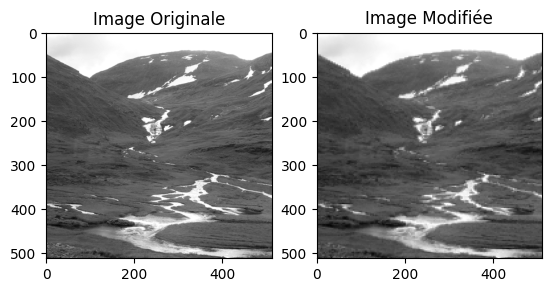

In [5]:
# Fonction pour minimiser la fonction objective en utilisant la méthode de Newton

def newton_method_with_equality_constraints(pi0, block, epsilon=1e-6, max_iterations=100):

    block_min = block.min()

    block_max = block.max()

    block_normalized = (block - block_min) / (block_max - block_min + 1e-6)

    pi = pi0.copy()

    for _ in range(max_iterations):

        grad_f = gradient(pi)

        hess_f = hessian(pi)

        if np.any(np.linalg.eigvals(hess_f) <= 0):

            print("La matrice Hessienne n'est pas définie positive.")

            break

        A = linear_constraint_matrix(pi)

        b = linear_constraint_vector()

        AT = A.T

        system_matrix = np.block([[hess_f, AT], [A, np.zeros((2, 2))]])

        rhs = np.concatenate([-grad_f, -np.dot(A, pi) + b])

        try:

            solution, residuals, rank, s = np.linalg.lstsq(system_matrix, rhs, rcond=None)

        except Exception as e:

            print("Erreur lors de la résolution du système linéaire:", e)

            break

        delta_pi = solution[:len(pi)]

        pi += delta_pi

        if np.linalg.norm(delta_pi) < epsilon:

            break

    optimal_pi = pi

    adjusted_block = optimal_pi * (block_max - block_min) + block_min

    adjusted_block = np.clip(adjusted_block, 0, 255).astype(np.uint8)

    return adjusted_block

# Remplacer par le chemin de l'image souhaitée

image_path = "3.pgm"

image = Image.open(image_path).convert('L')

image_array = np.array(image)

block_size = 3

Nb = image_array.shape[0] // block_size

# Traiter l'image par blocs

for i in range(Nb):

    for j in range(Nb):
                                                        # Utilisation d'un rho constant et d'un d0 assez grand

        rho_values = np.ones(block_size * block_size)

        d0 = 2 * block_size                             # d0 n'est plus trop restrictif

        pi0 = np.ones(block_size * block_size) / (block_size * block_size)

        block = image_array[i * block_size: (i + 1) * block_size, j * block_size: (j + 1) * block_size]

        result_block = newton_method_with_equality_constraints(pi0, block)

        result_block_reshaped = result_block.reshape((block_size, block_size))

        image_array[i * block_size: (i + 1) * block_size, j * block_size: (j + 1) * block_size] = result_block_reshaped


# Affichage des images

plt.subplot(1, 2, 1)

plt.imshow(image, cmap='gray')

plt.title('Image Originale')

plt.subplot(1, 2, 2)

plt.imshow(image_array, cmap='gray')

plt.title('Image Modifiée')

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/3.pgm'

# ▶▶ **Pour différentes cartes de poids** ◀◀

# ***Exponential cone solver*** ✔
>>>>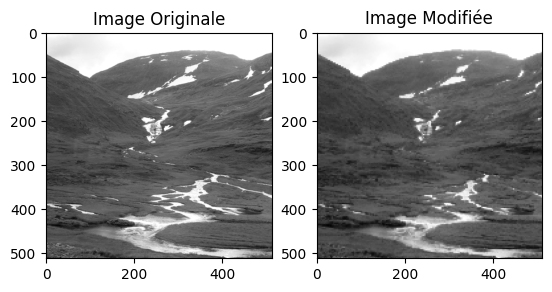

In [ ]:
# Fonction pour générer des poids aléatoires pour chaque bloc

def generate_rho(block_size, variance=0.5):

    return np.random.rand(block_size**2) * variance + 0.5

# Fonction pour maximiser la fonction d'entropie

def apply_maxent_to_block_cvxpy(block, rho, d0):

    M = block.size

    pi = cp.Variable(M)

    block_min = block.min()

    block_max = block.max()

    block_normalized = (block - block_min) / (block_max - block_min + 1e-6)


    # Fonction objectif : Maximiser l'entropie

    objective = cp.Maximize(cp.sum(cp.entr(pi)))


    # Contraintes

    constraints = [cp.sum(pi) == 1, pi >= 0, cp.matmul(rho, pi) <= d0]


    # Résoudre le problème d'optimisation

    prob = cp.Problem(objective, constraints)

    result = prob.solve()


    # Vérifier le statut de la résolution

    if prob.status != cp.OPTIMAL:

        print(f"Problème non résolu : Statut = {prob.status}")

        return block             # Retourner le bloc original si non résolu


    # Ajuster les valeurs optimisées à l'échelle de niveaux de gris

    optimal_pi = pi.value

    adjusted_block = optimal_pi * (block_max - block_min) + block_min

    adjusted_block = np.clip(adjusted_block, 0, 255).astype(np.uint8)

    return adjusted_block.reshape(block.shape)


# Remplacer par le chemin de l'image souhaitée

image_path = "3.pgm"

image = Image.open(image_path).convert('L')

image_array = np.array(image)

block_size = 3

Nb = image_array.shape[0] // block_size


# Traiter l'image par blocs avec des poids différents

for i in range(Nb):

    for j in range(Nb):

        # Générer un rho différent pour chaque bloc

        rho = generate_rho(block_size)

        d0 = 2 * block_size

        block = image_array[i * block_size: (i + 1) * block_size, j * block_size: (j + 1) * block_size]

        result_block = apply_maxent_to_block_cvxpy(block, rho, d0)

        image_array[i * block_size: (i + 1) * block_size, j * block_size: (j + 1) * block_size] = result_block


# Affichage des images

plt.subplot(1, 2, 1)

plt.imshow(image, cmap='gray')

plt.title('Image Originale')

plt.subplot(1, 2, 2)

plt.imshow(image_array, cmap='gray')

plt.title('Image Modifiée')

plt.show()

# ***Algorithme de Newton*** ✔
>>>>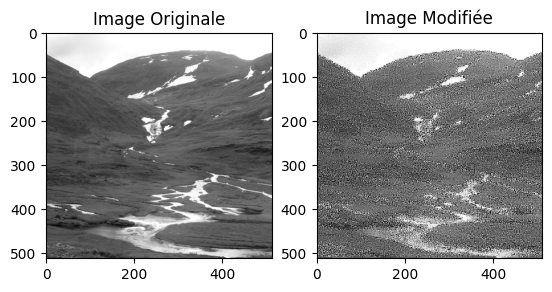

In [ ]:
# Fonction pour générer des poids aléatoires pour chaque bloc

def generate_rho(block_size, variance=0.5):

    # Générer des poids aléatoires pour chaque bloc

    return np.random.rand(block_size**2) * variance + 0.5


# Fonction pour minimiser la fonction objective en utilisant la méthode de Newton

def newton_method_with_equality_constraints(pi0, block, epsilon=1e-6, max_iterations=100):

    block_min = block.min()

    block_max = block.max()

    block_normalized = (block - block_min) / (block_max - block_min + 1e-6)

    pi = pi0.copy()

    for _ in range(max_iterations):

        grad_f = gradient(pi)

        hess_f = hessian(pi)

        if np.any(np.linalg.eigvals(hess_f) <= 0):

            break

        A = linear_constraint_matrix(pi)

        b = linear_constraint_vector()

        AT = A.T

        system_matrix = np.block([[hess_f, AT], [A, np.zeros((2, 2))]])

        rhs = np.concatenate([-grad_f, -np.dot(A, pi) + b])

        try:

            solution, residuals, rank, s = np.linalg.lstsq(system_matrix, rhs, rcond=None)

        except Exception as e:

            print("Erreur lors de la résolution du système linéaire:", e)

            break

        delta_pi = solution[:len(pi)]

        pi += delta_pi

        if np.linalg.norm(delta_pi) < epsilon:

            break

    optimal_pi = pi

    adjusted_block = optimal_pi * (block_max - block_min) + block_min

    adjusted_block = np.clip(adjusted_block, 0, 255).astype(np.uint8)

    return adjusted_block


# Remplacer par le chemin de l'image souhaitée

image_path = "3.pgm"

image = Image.open(image_path).convert('L')

image_array = np.array(image)

block_size = 3

Nb = image_array.shape[0] // block_size


# Traiter l'image par blocs

for i in range(Nb):

    for j in range(Nb):
                                                           # Utilisation d'un rho constant et d'un d0 assez grand

        rho_values = generate_rho(block_size)

        d0 = 2 * block_size                                # d0 n'est plus trop restrictif

        pi0 = np.ones(block_size * block_size) / (block_size * block_size)

        block = image_array[i * block_size: (i + 1) * block_size, j * block_size: (j + 1) * block_size]

        result_block = newton_method_with_equality_constraints(pi0, block)

        result_block_reshaped = result_block.reshape((block_size, block_size))

        image_array[i * block_size: (i + 1) * block_size, j * block_size: (j + 1) * block_size] = result_block_reshaped


# Affichage des images

plt.subplot(1, 2, 1)

plt.imshow(image, cmap='gray')

plt.title('Image Originale')

plt.subplot(1, 2, 2)

plt.imshow(image_array, cmap='gray')

plt.title('Image Modifiée')

plt.show()


#  ✅ ✅ **On constate que la meilleure image modifiée est obtenue par la méthode de Newton pour une carte de poids équivalente entre tous les pixels. Ceci n'est pas contradictoire aux résultats obtenus au début du problème. Le taux d'insertion pour la méthode de Newton n'est certes pas le plus élevé, mais c'est celui qui assure une faible distorsion de l'image originale** ✅ ✅